<a href="https://colab.research.google.com/github/rrizqiaa/MachineLearningTasks/blob/main/4thWeekTask/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from scipy import stats
from typing import List, Optional
from collections import defaultdict
import random

# Load data
data_path = 'StudentsPerformance.csv'
df = pd.read_csv(data_path)

# 1. Mengisi Nilai Hilang dengan Rata-Rata
def handle_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    return df.fillna(df.mean(numeric_only=True))

# 2. Normalisasi Fitur
def normalize_features(df: pd.DataFrame) -> pd.DataFrame:
    scaler = MinMaxScaler()
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

# 3. One-Hot Encoding
def one_hot_encode(df: pd.DataFrame, columns: List[str]) -> pd.DataFrame:
    # Change 'sparse' to 'sparse_output'
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_columns = encoder.fit_transform(df[columns])
    df_encoded = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns))
    df = df.drop(columns, axis=1).join(df_encoded)
    return df


# 4. Deteksi Outlier menggunakan Z-Score
def z_score_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
    z_scores = np.abs(stats.zscore(df[column]))
    return df[(z_scores > 2)]

# 5. Deteksi Outlier menggunakan IQR
def iqr_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# 6. Moving Average
def moving_average(data: List[float], window_size: int) -> List[float]:
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# 7. Mean Imputation
def mean_imputation(data: List[Optional[float]]) -> List[float]:
    mean = np.mean([x for x in data if x is not None])
    return [x if x is not None else mean for x in data]

# 8. Min-Max Scaling
def min_max_scaling(df: pd.DataFrame) -> pd.DataFrame:
    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 9. SMOTE (Synthetic Minority Over-sampling Technique)
def smote(data: np.ndarray, target: np.ndarray, minority_class: int, n_samples: int) -> np.ndarray:
    minority_indices = np.where(target == minority_class)[0]
    synthetic_samples = []

    for _ in range(n_samples):
        sample_idx = random.choice(minority_indices)
        neighbor_idx = random.choice(minority_indices)

        diff = data[neighbor_idx] - data[sample_idx]
        gap = random.random()
        synthetic_sample = data[sample_idx] + gap * diff
        synthetic_samples.append(synthetic_sample)

    return np.array(synthetic_samples)

# 10. Polynomial Features dan Interaction Terms
from sklearn.preprocessing import PolynomialFeatures

def create_interaction_terms(data: np.ndarray) -> np.ndarray:
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    return poly.fit_transform(data)

def create_polynomial_features(data: np.ndarray, degree: int) -> np.ndarray:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(data)

# 11. Z-Score Normalization
def z_score_normalization(data: np.ndarray) -> np.ndarray:
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Main script untuk demonstrasi
df_filled = handle_missing_values(df)
print("Data setelah penanganan nilai hilang:\n", df_filled.head())

df_normalized = normalize_features(df_filled)
print("\nData setelah normalisasi:\n", df_normalized.head())

df_encoded = one_hot_encode(df_filled, ['gender', 'race/ethnicity'])
print("\nData setelah one-hot encoding:\n", df_encoded.head())

outliers = z_score_outliers(df_filled, 'math score')
print("\nOutliers berdasarkan Z-score:\n", outliers)

iqr_outliers_data = iqr_outliers(df_filled, 'reading score')
print("\nOutliers berdasarkan IQR:\n", iqr_outliers_data)

# Implementasi moving average, polynomial features, SMOTE, dll bisa dilakukan dengan cara yang sama sesuai kebutuhan.


Data setelah penanganan nilai hilang:
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Data setelah normalisasi:
    gender race/ethnicity parental level of education         lunch  \
0  female        group

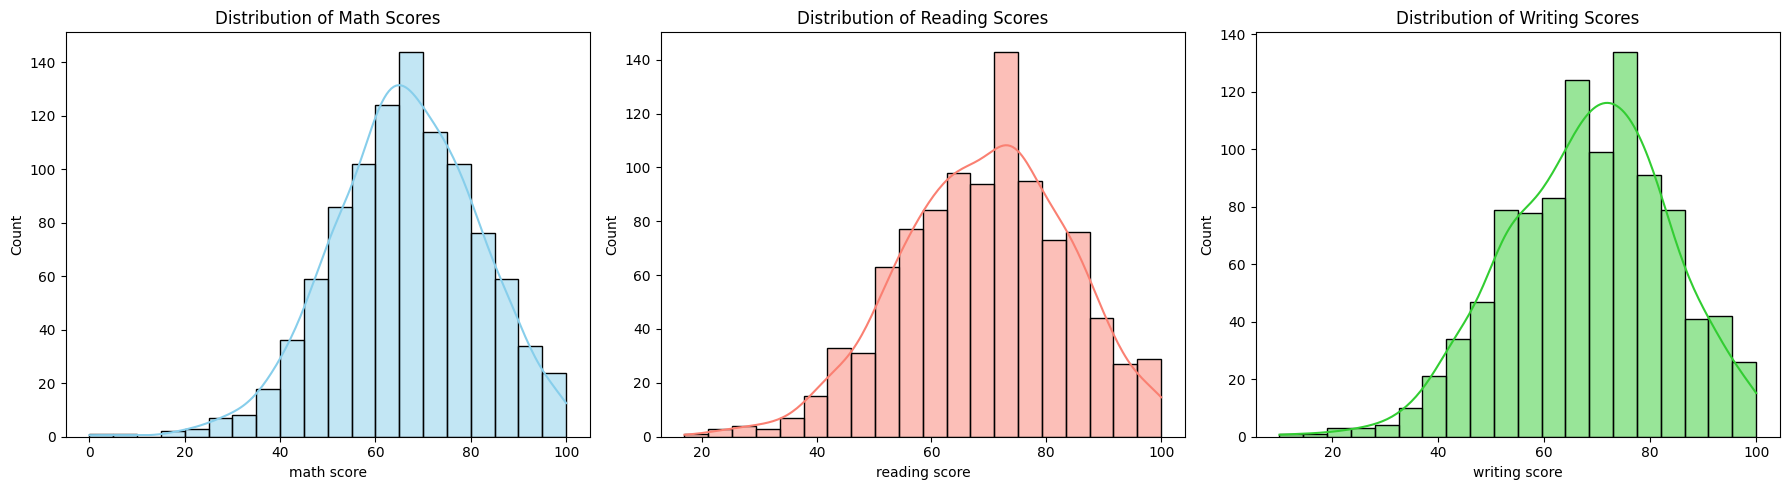

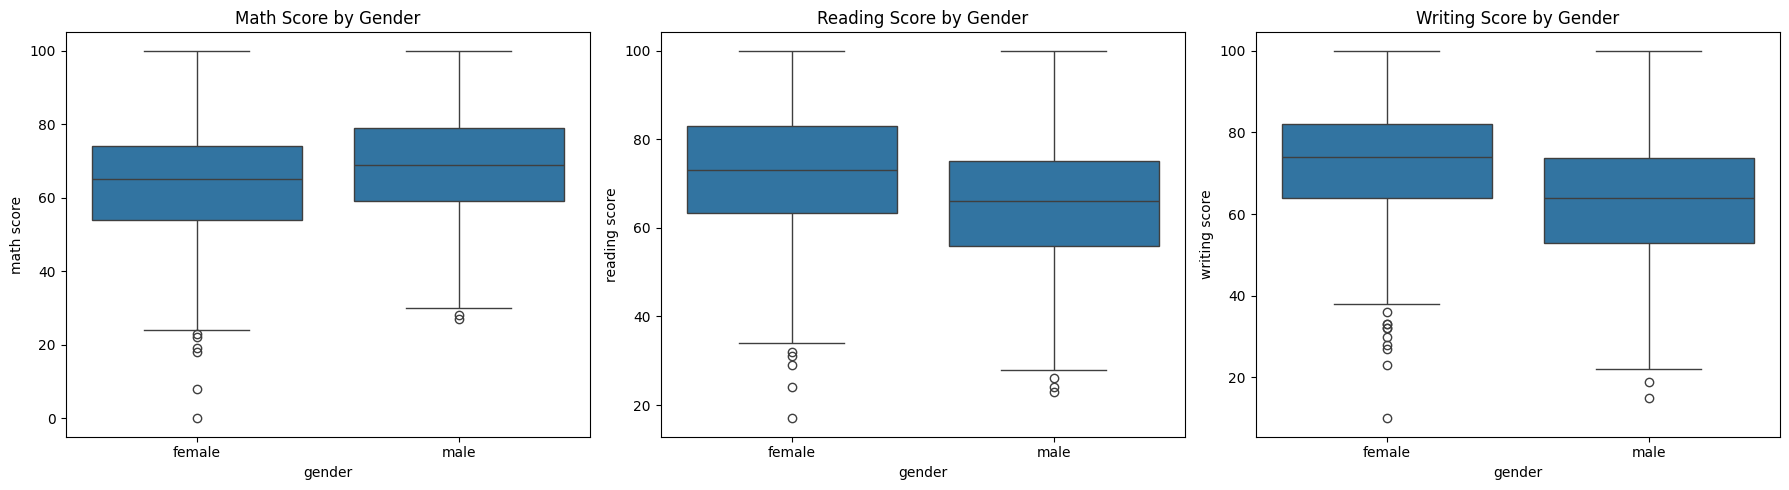

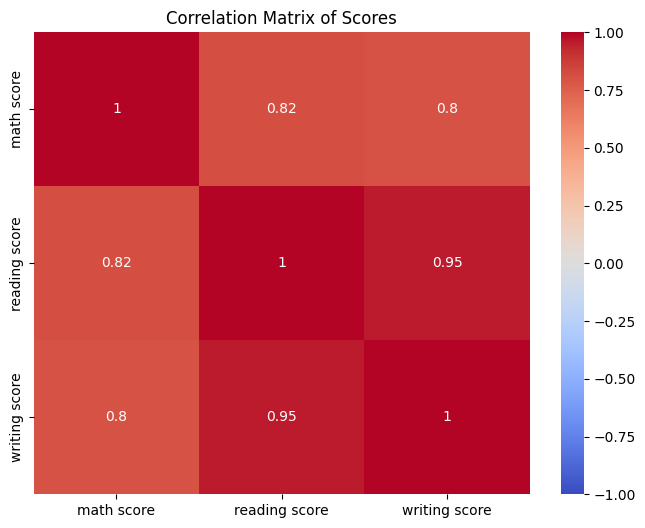

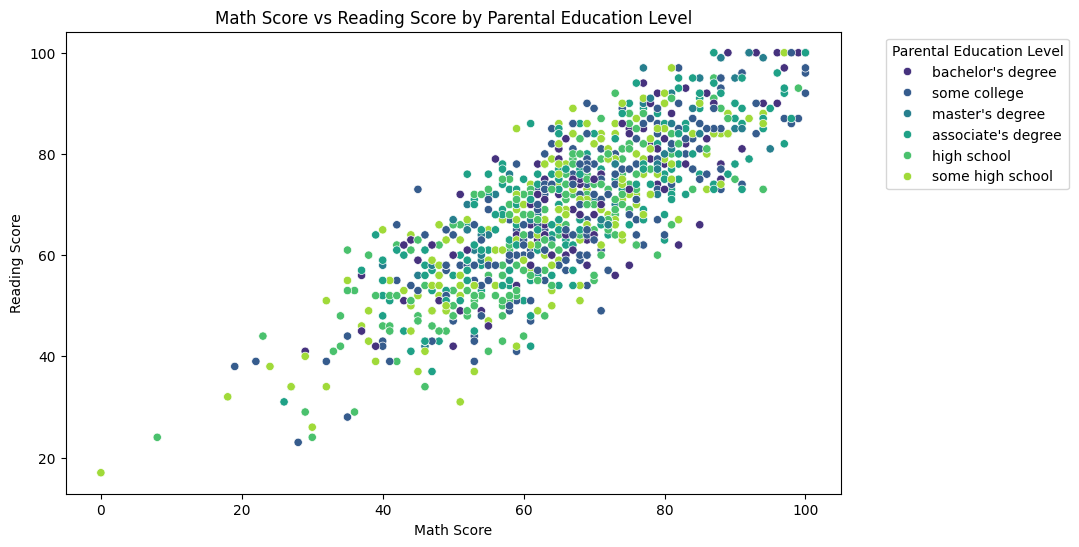

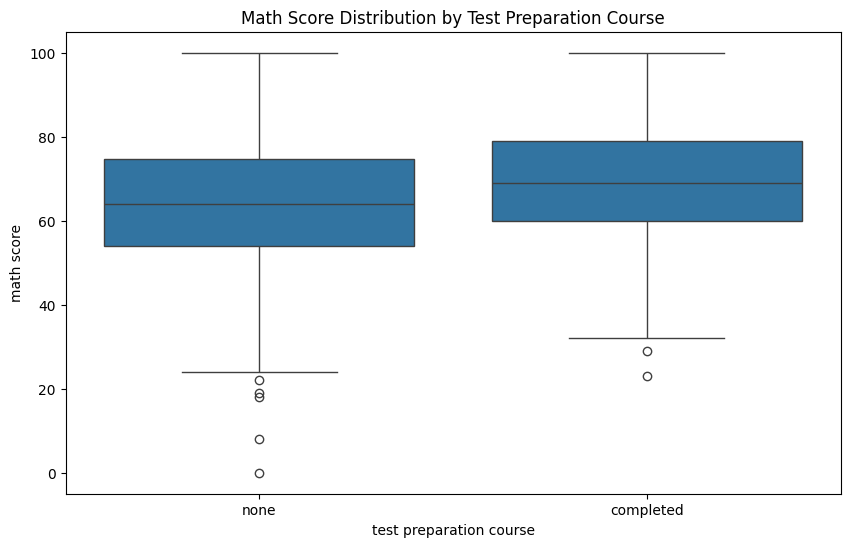

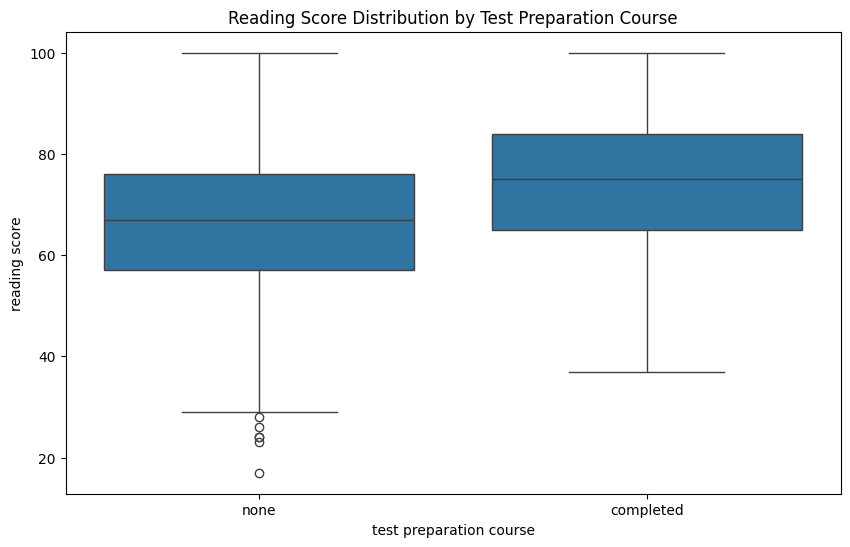

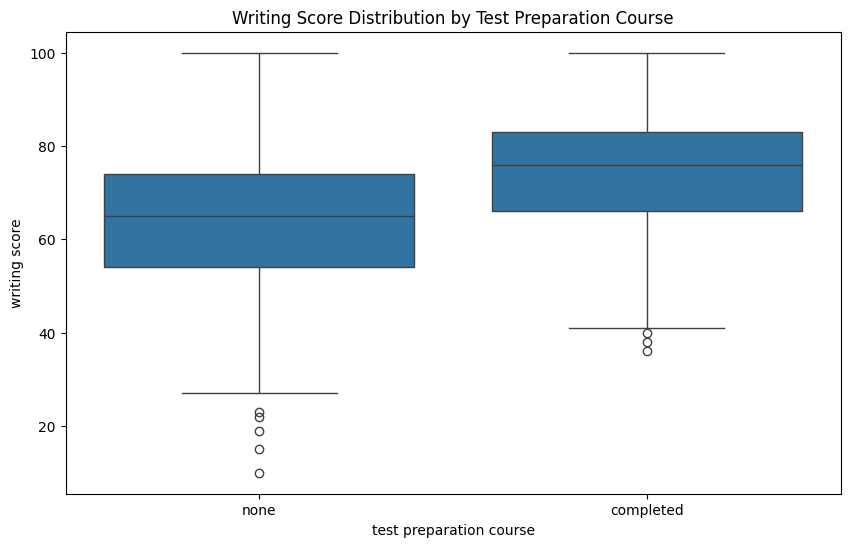

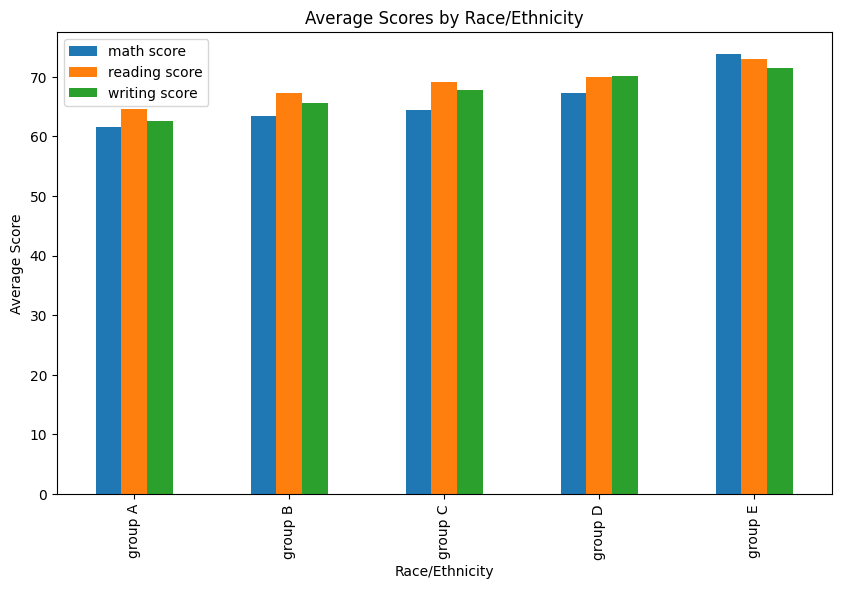

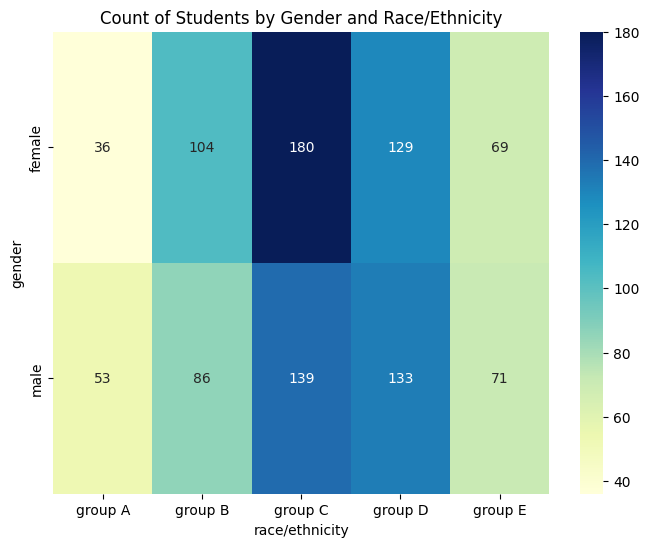

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
data_path = 'StudentsPerformance.csv'
df = pd.read_csv(data_path)

# Plotting histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['math score'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Math Scores')
sns.histplot(df['reading score'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Reading Scores')
sns.histplot(df['writing score'], bins=20, kde=True, ax=axes[2], color='limegreen')
axes[2].set_title('Distribution of Writing Scores')
plt.tight_layout()
plt.show()

# Boxplot for each subject by gender
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='gender', y='math score', data=df, ax=axes[0])
axes[0].set_title('Math Score by Gender')
sns.boxplot(x='gender', y='reading score', data=df, ax=axes[1])
axes[1].set_title('Reading Score by Gender')
sns.boxplot(x='gender', y='writing score', data=df, ax=axes[2])
axes[2].set_title('Writing Score by Gender')
plt.tight_layout()
plt.show()


# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Scores')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='math score', y='reading score', hue='parental level of education', data=df, palette='viridis')
plt.title('Math Score vs Reading Score by Parental Education Level')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend(title='Parental Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Math Score Distribution by Test Preparation Course')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='test preparation course', y='reading score', data=df)
plt.title('Reading Score Distribution by Test Preparation Course')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='test preparation course', y='writing score', data=df)
plt.title('Writing Score Distribution by Test Preparation Course')
plt.show()

# Mean scores by race/ethnicity
df_grouped = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()

df_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Race/Ethnicity')
plt.ylabel('Average Score')
plt.xlabel('Race/Ethnicity')
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['gender'], df['race/ethnicity']), annot=True, fmt="d", cmap="YlGnBu")
plt.title('Count of Students by Gender and Race/Ethnicity')
plt.show()

